# Explore the use of sea level from satellite altimetry for the budget

In [1]:
import sys
sys.path.append('../code')
import importlib

import numpy as np
import pandas as pd
import xarray as xr

import regionmask

import SeaLevelContrib as slc

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

In [11]:
importlib.reload(slc)

<module 'SeaLevelContrib' from '/Users/dewilebars/Projects/SLBudget/notebooks/../code/SeaLevelContrib.py'>

## Test the function that read satellite altimetry values for neirest points of tide gauge

In [5]:
tg_id = [20, 22, 23, 24, 25, 32]

In [93]:
altimetry_df = slc.altimetry_obs(tg_id, 0)

<AxesSubplot: xlabel='time'>

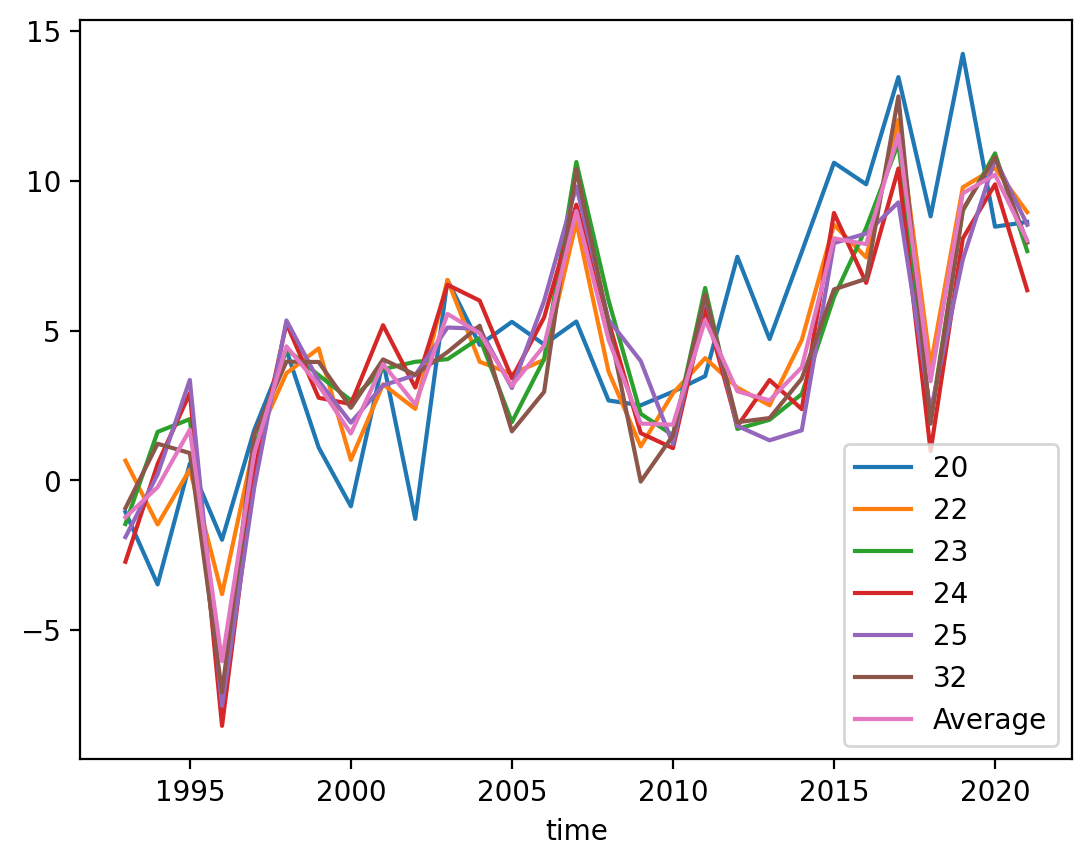

In [94]:
altimetry_df.plot()

In [95]:
altimetry_df #.index.name = 'time'

,20,22,23,24,25,32,Average
time,,,,,,,
1993,-1.050000,0.664167,-1.454167,-2.712500,-1.890833,-0.922500,-1.227639
1994,-3.468333,-1.468333,1.621667,0.551667,0.205833,1.227500,-0.221667
1995,0.561667,0.370000,2.047500,2.915833,3.355000,0.915000,1.694167
1996,-1.978333,-3.795000,-7.615833,-8.186667,-7.517500,-7.075833,-6.028194
1997,1.685833,1.195000,1.074167,0.263333,-0.232500,1.536667,0.920417
1998,4.347500,3.579167,4.383333,5.242500,5.340833,3.966667,4.476667
1999,1.102500,4.407500,3.513333,2.760000,3.324167,3.954167,3.176944
2000,-0.860833,0.687500,2.675000,2.550000,1.929167,2.425000,1.567639
2001,3.985833,3.210000,3.713333,5.180833,3.175833,4.040000,3.884306


## Check the difference for neighbour points and regions

In [19]:
%%time

duacs_dir = '~/Data/duacs_cmems/'
file_name = f'{duacs_dir}cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1M-m_*.nc'
duacs_ds = xr.open_mfdataset(file_name) #.load()
duacs_ds = slc.rotate_longitude(duacs_ds, 'longitude')
duacs_ds['sla'] = duacs_ds.sla*100 # Convert from meter to cm
duacs_y_ds = duacs_ds.groupby('time.year').mean()

CPU times: user 113 ms, sys: 58.3 ms, total: 171 ms
Wall time: 198 ms


/Users/dewilebars/anaconda3/envs/p310ds/lib/python3.9/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


In [24]:
df = pd.DataFrame(index=pd.Series(duacs_y_ds.year.values, name="time"))

In [12]:
geo_coord = slc.tg_lat_lon(tg_id[0])

In [30]:
point = duacs_y_ds.sel(latitude=geo_coord[0], longitude=geo_coord[1], method="nearest")
point2 = duacs_y_ds.sel(latitude=slice(geo_coord[0]-2, geo_coord[0]+2), 
                        longitude=slice(geo_coord[1]-2, geo_coord[1]+2),
                       ).mean(dim=["latitude","longitude"])

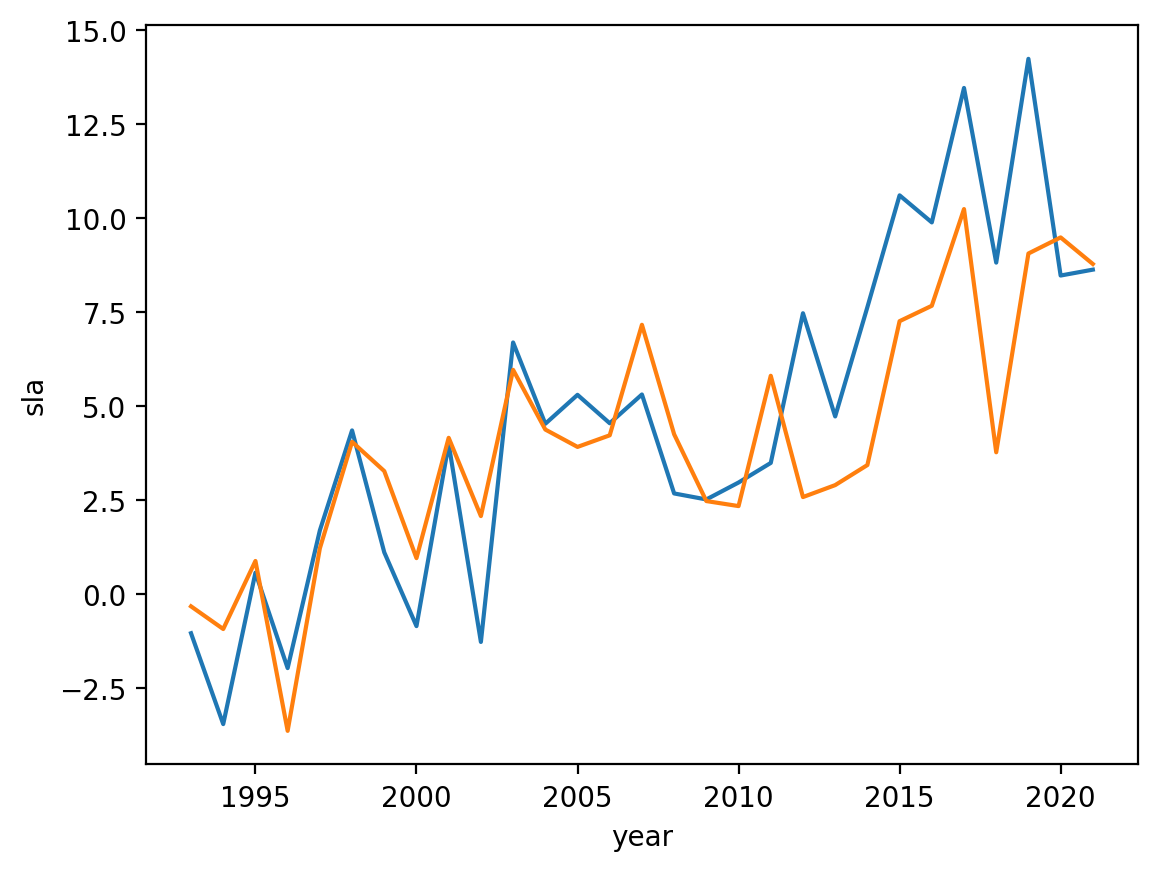

In [38]:
point.sla.plot()
point2.sla.plot()

In [39]:
reg = duacs_y_ds.sel(latitude=slice(geo_coord[0]-2, geo_coord[0]+2), 
                        longitude=slice(geo_coord[1]-2, geo_coord[1]+2),
                       )

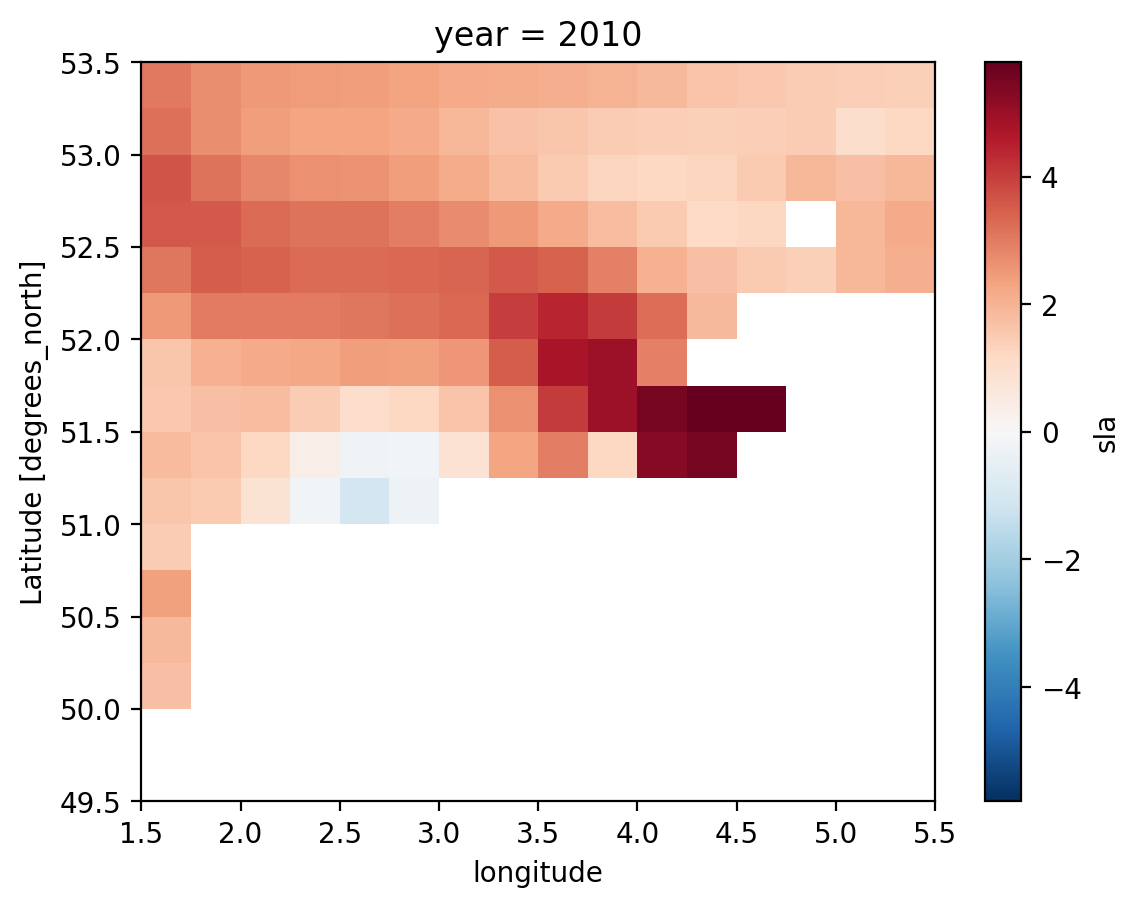

In [40]:
reg.sla.sel(year=2010).plot()

## Test the use of masks from the regionmask package

In [96]:
location = np.array([[2.5, 53], [3.3, 51.5], [4.25, 52.25], [4.75, 53.3], 
                     [5.5, 53.6], [7, 53.75], [7, 55], [4, 54.5]])

reg_df = slc.altimetry_obs(location, 0)

In [97]:
reg_df #['Average'].plot()

,region_average,Average
time,,
1993,-1.392398,-1.392398
1994,-0.695512,-0.695512
1995,2.090393,2.090393
1996,-5.479014,-5.479014
1997,1.176818,1.176818
1998,4.263695,4.263695
1999,3.473304,3.473304
2000,1.106225,1.106225
2001,4.192586,4.192586


<AxesSubplot: xlabel='time'>

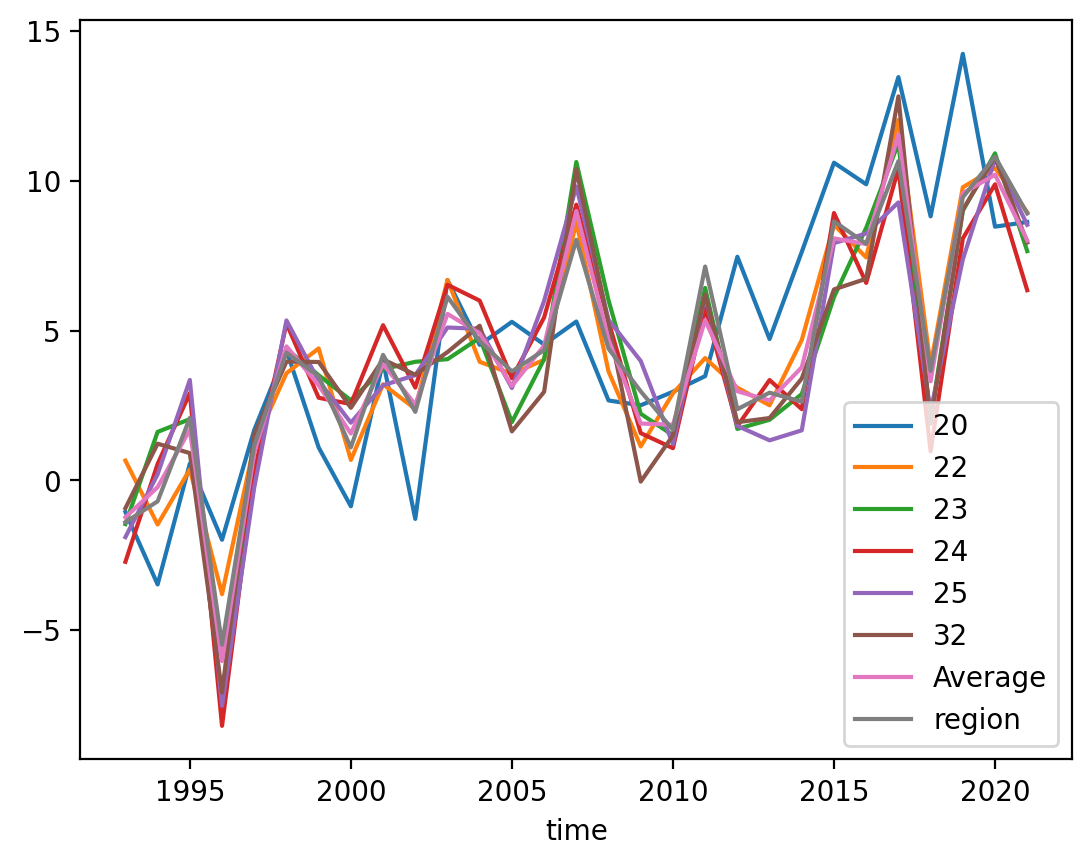

In [98]:
altimetry_df['region'] = reg_df['region_average']
altimetry_df.plot()

## Test the chunck size for best performance

In [12]:
%%time

altimetry_df = slc.altimetry_obs(tg_id, 0, 24)

CPU times: user 2min 37s, sys: 1min 33s, total: 4min 11s
Wall time: 38.6 s


In [13]:
%%time

altimetry_df = slc.altimetry_obs(tg_id, 0, 12)

CPU times: user 2min 33s, sys: 50 s, total: 3min 23s
Wall time: 32 s


In [14]:
%%time

altimetry_df = slc.altimetry_obs(tg_id, 0, 6)

CPU times: user 2min 28s, sys: 49.3 s, total: 3min 17s
Wall time: 31.4 s


In [15]:
%%time

altimetry_df = slc.altimetry_obs(tg_id, 0, 48)

CPU times: user 2min 48s, sys: 1min 44s, total: 4min 32s
Wall time: 48.3 s


In [21]:
%%time
# Default chunk size is 204
altimetry_df = slc.altimetry_obs(tg_id, 0, 204)

/Users/dewilebars/anaconda3/envs/p310ds/lib/python3.9/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


CPU times: user 2min 20s, sys: 1min 47s, total: 4min 8s
Wall time: 1min 52s
